[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


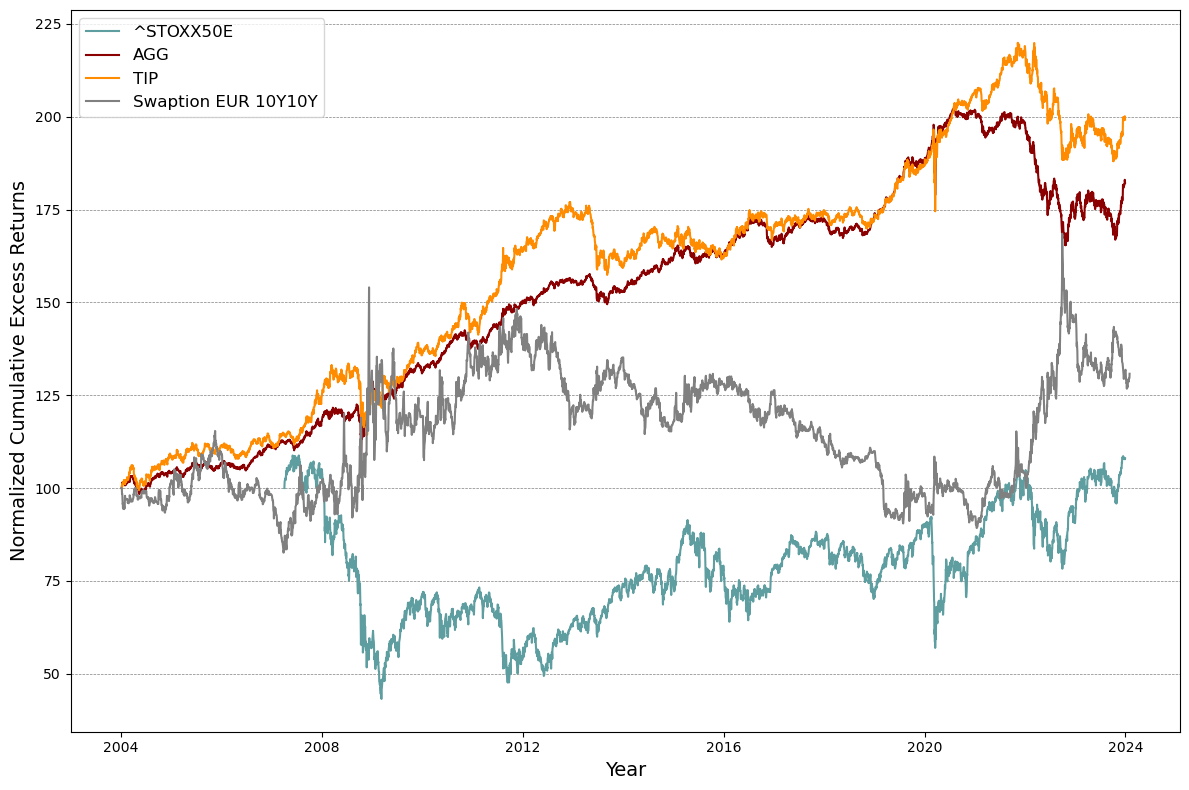

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def download_and_process_data(ticker, start_date, end_date):
    """
    Download historical data for a given ticker and process it to calculate 
    normalized cumulative excess returns.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Adj Close'].pct_change()
    data['Cumulative Excess Returns'] = (1 + data['Returns']).cumprod()
    initial_value = data['Cumulative Excess Returns'].dropna().iloc[0]
    data['Normalized Cumulative Excess Returns'] = data['Cumulative Excess Returns'] / initial_value * 100
    return data

def load_and_normalize_excel(file_path, sheet_name, column_name):
    """
    Load data from an Excel file and normalize the specified column.
    """
    df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
    initial_value = df[column_name].dropna().iloc[0]
    df[f'Normalized {column_name}'] = df[column_name] / initial_value * 100
    return df

def plot_data(data_dict, df_excel, date_column, normalized_column, colors, file_path):
    """
    Plot the normalized cumulative excess returns for given tickers and Excel data.
    """
    plt.figure(figsize=(12, 8))

    for ticker, data in data_dict.items():
        plt.plot(data.index, data['Normalized Cumulative Excess Returns'], label=f'{ticker}', color=colors.get(ticker, 'blue'))

    plt.plot(df_excel[date_column], df_excel[normalized_column], color='grey', label='Swaption EUR 10Y10Y')

    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Normalized Cumulative Excess Returns', fontsize=14)
    plt.legend(fontsize=12, loc='upper left')
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(file_path)
    plt.show()
    plt.close()

# Parameters
tickers = ['^STOXX50E', 'AGG', 'TIP']
colors = {'^STOXX50E': 'cadetblue', 'AGG': 'darkred', 'TIP': 'darkorange'}
start_dates = ['2004-01-01', '2022-01-04', '2007-01-02']
end_dates = ['2024-01-01', '2024-01-01', '2010-12-31']
excel_files = [
    '/Users/nannaingemannohrt/Desktop/master_thesis/main/data/ATM_10Y_10Y_from_2004_2024.xlsx',
    '/Users/nannaingemannohrt/Desktop/master_thesis/main/data/ATTM_2022_to_2024.xlsx',
    '/Users/nannaingemannohrt/Desktop/master_thesis/main/data/ATM_2007_to_2012.xlsx'
]
sheet_names = ['Ark1', 'Ark1', 'Ark1']
column_names = ['ATM_10Y_10Y', 'ATM_10Y_10Y', 'ATM_10Y_10Y']
file_paths = [
    "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/2004_to_2024_plot.png",
    "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/2022_to_2024.png",
    "/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/2007_to_2011.png"
]

# Process and plot data
for start_date, end_date, excel_file, sheet_name, column_name, file_path in zip(start_dates, end_dates, excel_files, sheet_names, column_names, file_paths):
    data_dict = {ticker: download_and_process_data(ticker, start_date, end_date) for ticker in tickers}
    df_excel = load_and_normalize_excel(excel_file, sheet_name, column_name)
    plot_data(data_dict, df_excel, "Dato", f'Normalized {column_name}', colors, file_path)
